In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('punkt')

In [162]:
df = pd.read_csv("/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv",index_col = 0)
df.drop('label_num' , axis = 1 ,inplace = True)
# df.columns = ['text' , 'target']
df.sample(5)

,label,text
3192,ham,Subject: re : gulf coast pipeline company dyer...
1485,ham,Subject: baytown 12 ' ' pigging affected meter...
1035,ham,Subject: calpine daily gas nomination\r\n- hid...
4489,spam,"Subject: eternal youth\r\nlet ' s face it , ag..."
3144,ham,"Subject: re : may wellhead "" spot "" purchases ..."


In [163]:
df['text_length'] = df['text'].apply(len)

In [164]:
df['words_count'] = df['text'].apply(lambda desc: len(nltk.word_tokenize(desc)))

In [165]:
df['lines_count'] = df['text'].apply(lambda desc: len(nltk.sent_tokenize(desc)))

In [166]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows
# how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
df['target']= label_encoder.fit_transform(df['label'])

In [167]:
df.sample(5)

,label,text,text_length,words_count,lines_count,target
3637,ham,Subject: re : killing ena to ena deals in sita...,1323,308,8,0
1482,ham,Subject: re : ect - im waha ? ? ?\r\nall excep...,1347,353,22,0
3499,ham,Subject: falcon / lone star transport\r\ndarre...,1179,256,18,0
3718,spam,Subject: exclusive positions in montanayoocwo\...,966,132,1,1
4302,spam,Subject: m 33 t someone tonight\r\nsexy\r\nmar...,458,86,4,1


In [168]:
print("shape of databade : " , df.shape)
df.info()

shape of databade :  (5171, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 605 to 4807
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5171 non-null   object
 1   text         5171 non-null   object
 2   text_length  5171 non-null   int64 
 3   words_count  5171 non-null   int64 
 4   lines_count  5171 non-null   int64 
 5   target       5171 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 282.8+ KB


EDA

/tmp/ipykernel_32/2802813450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True)


<Axes: >

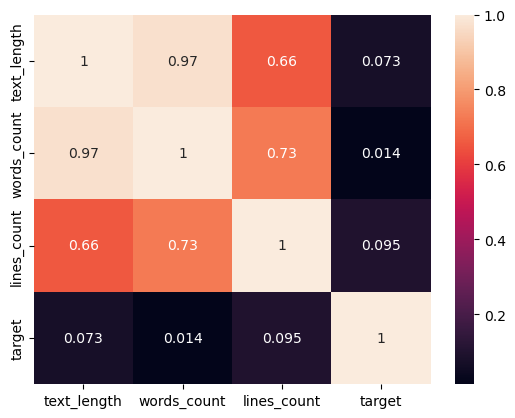

In [169]:
sns.heatmap(df.corr() , annot = True)

In [170]:
# from sklearn.model_selection import train_test_split

# # Assuming features and targets are defined
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=42)


In [188]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def text_transform(desc):
    text = desc.lower()
    text = nltk.word_tokenize(text)
    words = [word for word in text if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]

    # Apply stemming using PorterStemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    return " ".join(stemmed_words)

# Example usage
stemmed_words = text_transform(df.text[15])
print(stemmed_words)


subject meter 1431 nov 1999 daren could pleas resolv issu howard offic next two day done pleas let georg know thank aime forward aime lannou hou ect 12 15 99 01 27 pm howard b camp 12 15 99 01 01 pm aime lannou hou ect ect cc daren j farmer hou ect ect stacey neuweil hou ect ect mari smith hou ect ect subject meter 1431 nov 1999 aime sitara deal 92943 meter 1431 expir oct 31 1999 settlement unabl draft invoic deal deal either need extend new deal need set pleas let know resolv need resolv friday dec 17 hc


In [194]:
 df["transformed_text"] = df['text'].apply(text_transform)

In [216]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

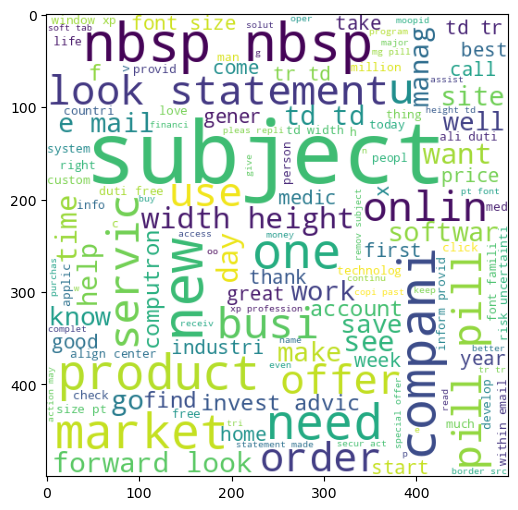

In [218]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

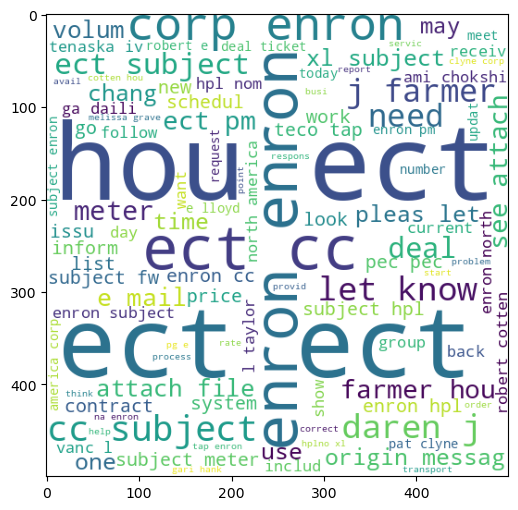

In [219]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [224]:
# spam_corpus = []
# for msg in df[df['target'] == 1]['transformed_text'].tolist():
#     for word in msg.split():
#         spam_corpus.append(word)
        
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [195]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [196]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [197]:
y = df['target'].values

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [203]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [205]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [206]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [207]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [208]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9835748792270531
Precision -  0.9609120521172638
For  KN
Accuracy -  0.9748792270531401
Precision -  0.9691780821917808
For  NB
Accuracy -  0.9507246376811594
Precision -  0.8830769230769231
For  DT
Accuracy -  0.8589371980676328
Precision -  0.6782407407407407
For  LR
Accuracy -  0.9652173913043478
Precision -  0.9049079754601227
For  RF
Accuracy -  0.9797101449275363
Precision -  0.9543973941368078
For  AdaBoost
Accuracy -  0.9642512077294686
Precision -  0.9174603174603174
For  BgC
Accuracy -  0.961352657004831
Precision -  0.9140127388535032
For  ETC
Accuracy -  0.9835748792270531
Precision -  0.9609120521172638
For  GBDT
Accuracy -  0.9507246376811594
Precision -  0.9307958477508651
For  xgb
Accuracy -  0.9681159420289855
Precision -  0.913312693498452


In [214]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df.sort_values('Accuracy', ascending=False, inplace=True)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.983575,0.960912
8,ETC,0.983575,0.960912
5,RF,0.979710,0.954397
1,KN,0.974879,0.969178
10,xgb,0.968116,0.913313
4,LR,0.965217,0.904908
6,AdaBoost,0.964251,0.917460
7,BgC,0.961353,0.914013
2,NB,0.950725,0.883077
9,GBDT,0.950725,0.930796


In [215]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('svc.pkl','wb'))